In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

import sys
sys.path.append("..")
from models import lstm,cnn

# 数据统计

In [26]:
import preprocess
from imp import reload
reload(preprocess)

# base_path = r"F:\mystyle\git\Sentiment-Analysis\data\ChnSentiCorp_htl_ba_2000"
base_path = r"../data/ChnSentiCorp_htl_ba_2000/"
data, label = preprocess.read_data(base_path)

In [27]:
print("Data Count : {0} ,Label Count : {1}".format(len(data),len(label)))
emotion = dict()
for v in label:
    emotion.setdefault("neg", 0)
    emotion.setdefault("pos", 0)
    emotion[v] += 1
    
    
print("Neg Count : {}".format(emotion["neg"]))
print("Pos Count : {}".format(emotion["pos"]))

Data Count : 2000 ,Label Count : 2000
Neg Count : 1000
Pos Count : 1000


# 数据预处理

## 替换\n\t

In [28]:
data[0]

'一开始本来要预定凯悦的，后来助理搞错了，订了个君悦。\r\r\n简单评价以下。\r\r\n柜台服务态度还可以，就是房间特小。\r\r\n最不满意的就是宾馆的车队。\r\r\n一开始我预约了一台丰田皇冠，后来我要用车的时候，柜台告诉我皇冠车出去了，只有花冠，然后告诉我价格是450元，我只好订下了。过一会儿花冠车司机过来了，就说价格是550元，立马抬高价格，我觉得这不是钱的问题，而是宾馆的信用问题。\r\r\n中午时间，我要去吃饭，叫司机12：30过来接我，结果等到12：30，他没有出现。只能给君悦打电话了。\r\r\n最不可忍受的就是那个司机一直边打电话边开车，那天我用车用了5个多小时，其中3个小时以上，司机都是在打电话。\r\r\n如果入住君悦要用车的话，千万不要用君悦的车。素质极差。\r\r\n\r\n\r\n'

In [29]:
for i,doc in enumerate(data):
    doc = doc.replace("\n"," ")
    doc = doc.replace("\t"," ")
    doc = doc.replace("\r"," ")
    data[i] = doc

In [30]:
data[0]

'一开始本来要预定凯悦的，后来助理搞错了，订了个君悦。   简单评价以下。   柜台服务态度还可以，就是房间特小。   最不满意的就是宾馆的车队。   一开始我预约了一台丰田皇冠，后来我要用车的时候，柜台告诉我皇冠车出去了，只有花冠，然后告诉我价格是450元，我只好订下了。过一会儿花冠车司机过来了，就说价格是550元，立马抬高价格，我觉得这不是钱的问题，而是宾馆的信用问题。   中午时间，我要去吃饭，叫司机12：30过来接我，结果等到12：30，他没有出现。只能给君悦打电话了。   最不可忍受的就是那个司机一直边打电话边开车，那天我用车用了5个多小时，其中3个小时以上，司机都是在打电话。   如果入住君悦要用车的话，千万不要用君悦的车。素质极差。       '

## 去掉标点符号

In [31]:
import re
from zhon.hanzi import punctuation as ch_p
from string import punctuation as en_p

for i,doc in enumerate(data):
    doc = re.sub(r"[{0}{1}]+".format(ch_p, en_p)," ", doc)
    doc = doc.strip()
    data[i] = doc

In [32]:
data[0]

'一开始本来要预定凯悦的 后来助理搞错了 订了个君悦    简单评价以下    柜台服务态度还可以 就是房间特小    最不满意的就是宾馆的车队    一开始我预约了一台丰田皇冠 后来我要用车的时候 柜台告诉我皇冠车出去了 只有花冠 然后告诉我价格是450元 我只好订下了 过一会儿花冠车司机过来了 就说价格是550元 立马抬高价格 我觉得这不是钱的问题 而是宾馆的信用问题    中午时间 我要去吃饭 叫司机12 30过来接我 结果等到12 30 他没有出现 只能给君悦打电话了    最不可忍受的就是那个司机一直边打电话边开车 那天我用车用了5个多小时 其中3个小时以上 司机都是在打电话    如果入住君悦要用车的话 千万不要用君悦的车 素质极差'

## 分词

In [33]:
import jieba

for i,doc in enumerate(data):
    cut_doc = jieba.cut(doc)
    cut_doc = " ".join(cut_doc)
    data[i] = cut_doc


In [34]:
data[0]

'一 开始 本来 要 预定 凯悦 的   后来 助理 搞错 了   订 了 个 君悦         简单 评价 以下         柜台 服务态度 还 可以   就是 房间 特小         最 不 满意 的 就是 宾馆 的 车队         一 开始 我 预约 了 一台 丰田 皇冠   后来 我要 用车 的 时候   柜台 告诉 我 皇冠 车 出去 了   只有 花冠   然后 告诉 我 价格 是 450 元   我 只好 订下 了   过 一会儿 花冠 车 司机 过来 了   就 说 价格 是 550 元   立马 抬高 价格   我 觉得 这 不是 钱 的 问题   而是 宾馆 的 信用 问题         中午 时间   我要 去 吃饭   叫 司机 12   30 过来 接 我   结果 等到 12   30   他 没有 出现   只能 给 君悦 打电话 了         最 不可 忍受 的 就是 那个 司机 一直 边 打电话 边 开车   那天 我 用车 用 了 5 个 多 小时   其中 3 个 小时 以上   司机 都 是 在 打电话         如果 入住 君悦 要 用车 的话   千万 不要 用君悦 的 车   素质 极差'

## 去掉停用词

In [36]:
# filename = r"F:\mystyle\git\Sentiment-Analysis\data\stopWord.txt"
filename = r"../data/stopWord.txt"
stop_words = list()
with open(filename,"r",encoding="utf-8") as f:
    for line in f:
        line = line.replace("\n", "")
        stop_words.append(line)

In [37]:
for i,doc in enumerate(data):
    words = doc.split(" ")
    temp = []
    for word in words:
        if word in stop_words:
            continue
        temp.append(word)
    data[i] = " ".join(temp)

In [38]:
data[0]

'本来 预定 凯悦 助理 搞错 订 君悦 简单 评价 以下 柜台 服务态度 房间 特小 最 满意 宾馆 车队 预约 一台 丰田 皇冠 我要 用车 柜台 告诉 皇冠 车 花冠 告诉 价格 450 元 只好 订下 一会儿 花冠 车 司机 过来 说 价格 550 元 抬高 价格 觉得 钱 问题 宾馆 信用 问题 中午 时间 我要 吃饭 司机 12 30 过来 接 12 30 出现 只能 君悦 打电话 最 不可 忍受 司机 一直 打电话 开车 那天 用车 小时 小时 以上 司机 打电话 入住 君悦 用车 用君悦 车 素质 极差'

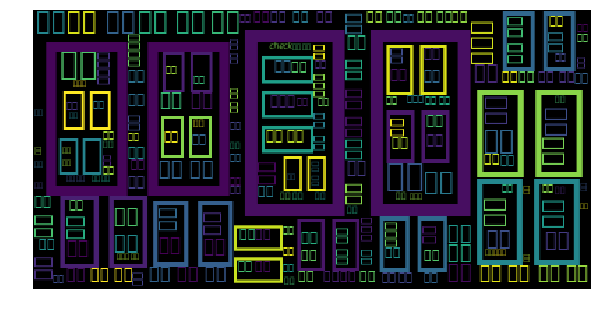

In [49]:
from wordcloud import WordCloud

wc = WordCloud(font_path="/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf")
text = " ".join(data)
img = wc.generate(text,)

plt.figure(figsize=(10,6))
plt.axis("off")
plt.imshow(img)

# TF-IDF + RF

## TFIDF

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(lowercase=False, max_features = 200)
tfidf_matrix = tfidf_v.fit_transform(data)

## 分离训练集和验证集

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,label,test_size = 0.1)

print("Train Count : {}".format(X_train.shape[0]))
print("Test Count : {}".format(X_test.shape[0]))

Train Count : 1757
Test Count : 196


## RF

In [114]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 150
max_features = "sqrt"

rfc = RandomForestClassifier(n_estimators=n_estimators,max_features=max_features)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = rfc.predict(X_test),y_pred = y_test)

0.8877551020408163

# LSTM

## 建立及转化词典

In [19]:
word2vocab = preprocess.create_vocab(data)

temp = list()
for sentence in data:
    sent_index = list()
    for word in sentence.split():
        index = word2vocab[word]
        sent_index.append(index)
    temp.append(sent_index)
        

## 获取最大长度的句子

In [26]:
# 获取最大长度的句子
max_sentence = max(temp, key = lambda x: len(x))
max_sentence_len = len(max_sentence)
max_sentence_len

394

## 统一长度

In [27]:
sentence_len =  120

for i,sentence_indexes in enumerate(temp):
    sentence_indexes.extend([0] * sentence_len)
    sentence_indexes = sentence_indexes[:sentence_len]

    temp[i] = sentence_indexes

In [29]:
data = np.asarray(temp)
data.shape

(1953, 120)

## 建立模型

In [49]:
from imp import reload
reload(lstm)

voc_size = len(word2vocab)
lstm_model = lstm.create_lstm(voc_size)
lstm_model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         2381000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               154080    
_________________________________________________________________
dense_6 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 81        
Total params: 2,544,841
Trainable params: 2,544,841
Non-trainable params: 0
_________________________________________________________________


In [50]:
lstm_model.compile(optimizer=tf.train.AdamOptimizer(),loss="binary_crossentropy",metrics=["accuracy"])

## 分离训练集验证集

In [51]:
import sklearn
from sklearn.model_selection import train_test_split

# pos转化为1，neg为0
temp_label = list()
for sub_label in label:
    v = 1 if sub_label == "pos" else 0
    temp_label.append(v)
label = temp_label
    
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size = 0.1)

## 训练

In [52]:
lstm_model.fit(X_train,y_train,epochs=40,batch_size=512,validation_data=(X_test,y_test))

Train on 1757 samples, validate on 196 samples
Epoch 1/40
1757/1757 [==============================]1757/1757 [==============================] - 7s 4ms/step - loss: 0.4022 - acc: 0.7126 - val_loss: 0.0630 - val_acc: 1.0000

Epoch 2/40
1757/1757 [==============================]1757/1757 [==============================] - 6s 4ms/step - loss: 0.0387 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 1.0000

Epoch 3/40
1757/1757 [==============================]1757/1757 [==============================] - 6s 4ms/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 4/40
1757/1757 [==============================]1757/1757 [==============================] - 7s 4ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000

Epoch 5/40
1757/1757 [==============================]1757/1757 [==============================] - 7s 4ms/step - loss: 8.9652e-04 - acc: 1.0000 - val_loss: 5.3177e-04 - val_acc: 1.0000

Epoch 6/40
1757/1757 [==============================]1757/17

# CNN

## 建立词的映射

In [35]:
word2vocab = preprocess.create_vocab(data)

temp = list()
for sentence in data:
    sent_index = list()
    for word in sentence.split():
        index = word2vocab[word]
        sent_index.append(index)
    temp.append(sent_index)

## 规整长度

In [36]:
sentence_len =  120

for i,sentence_indexes in enumerate(temp):
    sentence_indexes.extend([0] * sentence_len)
    sentence_indexes = sentence_indexes[:sentence_len]

    temp[i] = sentence_indexes

In [37]:
data = np.asarray(temp)
data.shape

(1953, 120)

## 建立模型

In [45]:
from imp import reload
reload(cnn)

voca_size = len(word2vocab)
cnn_model = cnn.create_cnn(voca_size)
cnn_model.compile(optimizer=tf.train.AdamOptimizer(),loss="binary_crossentropy",metrics=["accuracy"])
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 200)         2381000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 4)           4004      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 80)                400       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 81        
Total params: 2,385,485
Trainable params: 2,385,485
Non-trainable params: 0
_________________________________________________________________


In [43]:
data.shape

(1953, 120)

## 训练

In [48]:
batch = 128
epoch = 30

# pos转化为1，neg为0
temp_label = list()
for sub_label in label:
    v = 1 if sub_label == "pos" else 0
    temp_label.append(v)
label = temp_label
    
cnn_model.fit(
    x=data,a
    y =label,
    batch_size=batch,
    epochs=epoch,
    shuffle=True,
    validation_split=0.1
)

Train on 1757 samples, validate on 196 samples
Epoch 1/30
1757/1757 [==============================]1757/1757 [==============================] - 2s 1ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000

Epoch 2/30
1757/1757 [==============================]1757/1757 [==============================] - 2s 1ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000

Epoch 3/30
1757/1757 [==============================]1757/1757 [==============================] - 2s 1ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000

Epoch 4/30
1757/1757 [==============================]1757/1757 [==============================] - 2s 992us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000

Epoch 5/30
1757/1757 [==============================]1757/1757 [==============================] - 2s 998us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0030 - val_acc: 1.0000

Epoch 6/30
1757/1757 [==============================]1757/1757 [